In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris
plt.rc('font', family='Verdana')

Форма массива X: (26, 2)


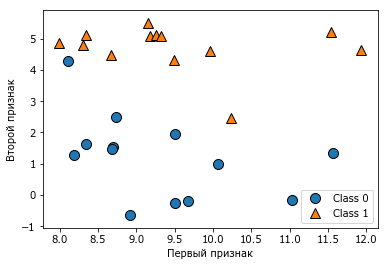

In [2]:
#генерирум набор данных
X, y = mglearn.datasets.make_forge()
#строим график для набора данных
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива X: {}".format(X.shape))

Text(0, 0.5, 'Целевая переменная')

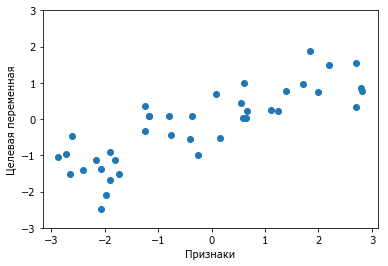

In [3]:
#пример регрессии
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Признаки')
plt.ylabel('Целевая переменная')

In [4]:
#Данные раковых опухлей молочной железы
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer['data'].shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [5]:
# Количество доброкачественных (benign) и злокачественных (malignant) опухолей
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [6]:
#Данные районов продажи домов в Бостоне
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [7]:
# Производные признаки для Бостонского набора данных, которые включает дополнительные значения
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


In [8]:
# Пример К ближайших соседей
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# устанавливаем значение 3ёх ближайших точек
k_means = KNeighborsClassifier(n_neighbors=3)
k_means.fit(X_train, y_train)

# прогнозы на тестовом наборе данных
k_means.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [10]:
# Правильность на тестовом наборе
print("{:.2f}".format(k_means.score(X_test, y_test)))

0.86


# Анализ работы KNeighborsClassifier

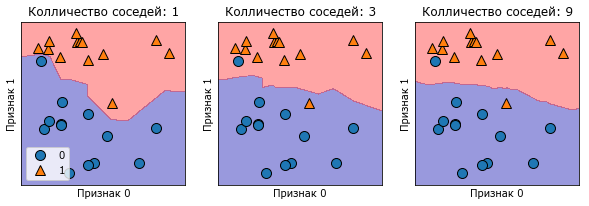

In [11]:
# Проверка на 1, 3, 9 ближайших соседей
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    k_means = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(k_means, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Колличество соседей: {}".format(n_neighbors))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend(loc=3)

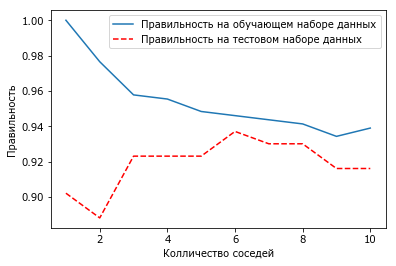

In [12]:
#здесь мы берем набор данных опухлей молочной железы и использум K'ближайших
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #строим модель
    k_means = KNeighborsClassifier(n_neighbors = n_neighbors)
    k_means.fit(X_train, y_train)
    #записываем правильность на обучающем наборе
    training_accuracy.append(k_means.score(X_train, y_train))
    #записываем правильность на тестовом наборе
    test_accuracy.append(k_means.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Правильность на обучающем наборе данных")
plt.plot(neighbors_settings, test_accuracy, label="Правильность на тестовом наборе данных", linestyle='dashed', color='red')
plt.ylabel('Правильность')
plt.xlabel('Колличество соседей')
plt.legend()

# Регрессия k ближайших соседей

In [13]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#создаём экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors = 3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [14]:
print('Прогнозы для тестового набора:\n{}'.format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [15]:
print('R^2 на тестовом наборе данных: {:.2f}'.format(reg.score(X_test, y_test)))

R^2 на тестовом наборе данных: 0.83


### Анализ модели KNeighborsRegressor

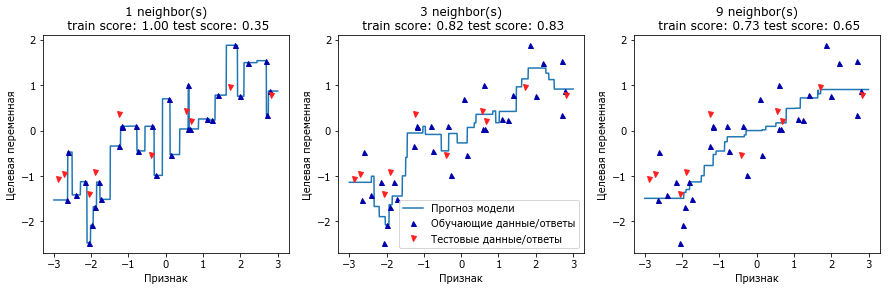

In [16]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
# создаём 1000 точек данных равномерной распределний
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    # получаем прогнозы используя 1, 3, 9 соседей
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=5)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=5)    
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Признак')
    ax.set_ylabel('Целевая переменная')

axes[1].legend(["Прогноз модели","Обучающие данные/ответы", "Тестовые данные/ответы"], loc="lower right")

# Линейные модели

In [17]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [18]:
# Выводим параметр наклона прямой (w) веса/коэффицент и сдвиг/константа (b)
print('lr.coef: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))

lr.coef: [0.39390555]
lr.intercept: -0.031804343026759746


In [19]:
# проверка правильности прогнооза модели
print('на обучающем наборе: {:.2f}'.format(lr.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lr.score(X_test, y_test)))

на обучающем наборе: 0.67
на тестовом наборе: 0.66


In [20]:
# как видим результат 0,66. относительно это мало. возьмём данные с большим признаком и наблюдений. ниже код
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print('на обучающем наборе: {:.2f}'.format(lr.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lr.score(X_test, y_test)))

на обучающем наборе: 0.95
на тестовом наборе: 0.61


In [21]:
# мы видим что данные в тестовом наборе намного меньше чем в обучающем, это говорит нам о том что модель ПЕРЕОБУЧЕНА.
# для более качественного прогноза будем использовать Гребневую регрессию

### Гребневая регрессия

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('на обучающем наборе: {:.2f}'.format(ridge.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(ridge.score(X_test, y_test)))

на обучающем наборе: 0.89
на тестовом наборе: 0.75


In [23]:
# пример с использованием переметра alpha. По умолчанию он равен 1. 
# При увелечении alpha мы заставляем коэффиценты сжиматься до всё более к близких  к нулю значений
# При уменьшении alpha мы сжимаем коэффиценты в меньшей степени, что означает движение вправо на графике
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Увелечение параметра alpha')
print('на обучающем наборе: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(ridge10.score(X_test, y_test)))

print()

# Модель очень близка к линейной регрессии
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Уменьшение параметра alpha')
print('на обучающем наборе: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(ridge10.score(X_test, y_test)))

Увелечение параметра alpha
на обучающем наборе: 0.79
на тестовом наборе: 0.64

Уменьшение параметра alpha
на обучающем наборе: 0.79
на тестовом наборе: 0.64


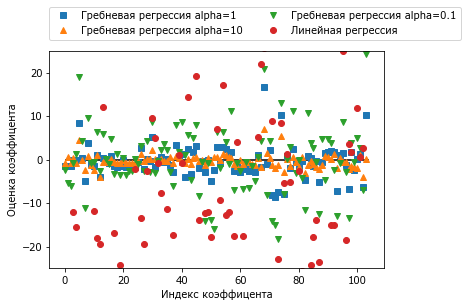

In [24]:
plt.plot(ridge.coef_, 's', label='Гребневая регрессия alpha=1')
plt.plot(ridge10.coef_, '^', label='Гребневая регрессия alpha=10')
plt.plot(ridge01.coef_, 'v', label='Гребневая регрессия alpha=0.1')
plt.plot(lr.coef_, 'o', label='Линейная регрессия')

plt.xlabel('Индекс коэффицента')
plt.ylabel('Оценка коэффицента')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0, 1.05))

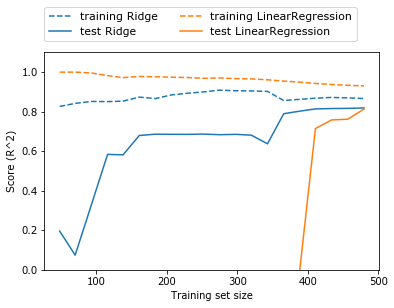

In [25]:
mglearn.plots.plot_ridge_n_samples()

### Лассо-регрессия

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [27]:
# Лассо регрессия даёт меньшие значения, это нам говорит о её недообучения
print('на обучающем наборе: {:.2f}'.format(lasso.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lasso.score(X_test, y_test)))
print('количество использованных признаков: {}'.format(np.sum(lasso.coef_ != 0)))

на обучающем наборе: 0.29
на тестовом наборе: 0.21
количество использованных признаков: 4


In [28]:
# попробуем уменьшить alpha значение,при это нужно увеличить значения параметра max_iter
# при такой корректировки количество использованных признаков намного больше, чем в выше
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print('на обучающем наборе: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('количество использованных признаков: {}'.format(np.sum(lasso001.coef_ != 0)))

на обучающем наборе: 0.94
на тестовом наборе: 0.74
количество использованных признаков: 67


In [29]:
# Однако использовав низкое значение alpha, получим переобучение модели
lasso00001 = Lasso(alpha=0.00001, max_iter=1000000).fit(X_train, y_train)
print('на обучающем наборе: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('количество использованных признаков: {}'.format(np.sum(lasso00001.coef_ != 0)))

на обучающем наборе: 0.95
на тестовом наборе: 0.62
количество использованных признаков: 103


Text(0, 0.5, 'Оценка коэффицента')

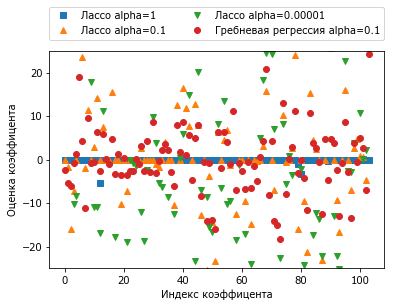

In [30]:
# строим график
plt.plot(lasso.coef_, 's', label='Лассо alpha=1')
plt.plot(lasso001.coef_, '^', label='Лассо alpha=0.1')
plt.plot(lasso00001.coef_, 'v', label='Лассо alpha=0.00001')
plt.plot(ridge01.coef_, 'o', label='Гребневая регрессия alpha=0.1')

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel('Индекс коэффицента')
plt.ylabel('Оценка коэффицента')

### Линеные модели для задач классификации

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

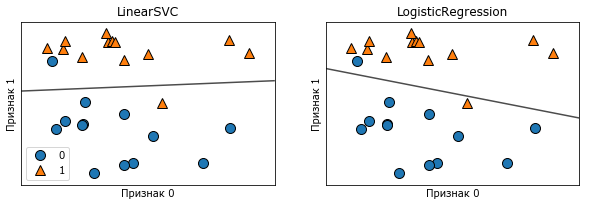

In [5]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=100000), LogisticRegression(solver='lbfgs')], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel('Признак 0')
    ax.set_ylabel('Признак 1')
axes[0].legend()

In [33]:
# Проанализируем работу класса LogisticRegression на наборе данных Breast Cancer
# так как модель на тестовом и обучающем наборе одинаково, вполне вероятно модель недообучена
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train, y_train)
print('на обучающем наборе: {:.3f}'.format(logreg.score(X_train, y_train)))
print('на тестовом наборе: {:.3f}'.format(logreg.score(X_test, y_test)))

на обучающем наборе: 0.958
на тестовом наборе: 0.958


In [34]:
# Давайте использовать параметр С для более точного предсказания
logreg100 = LogisticRegression(solver='lbfgs', max_iter=5000, C=100).fit(X_train, y_train)
print('на обучающем наборе: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('на тестовом наборе: {:.3f}'.format(logreg100.score(X_test, y_test)))

на обучающем наборе: 0.984
на тестовом наборе: 0.965


In [35]:
# Посмотрим что нам даст если мы уменьшим параметр C
logreg001 = LogisticRegression(solver='lbfgs', max_iter=5000, C=0.01).fit(X_train, y_train)
print('на обучающем наборе: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('на тестовом наборе: {:.3f}'.format(logreg001.score(X_test, y_test)))

на обучающем наборе: 0.953
на тестовом наборе: 0.951


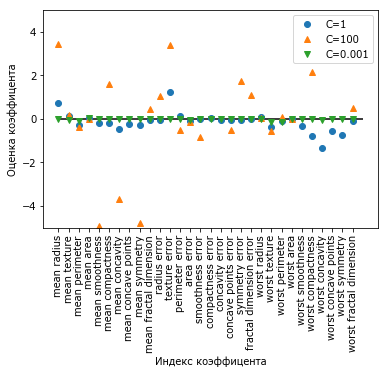

In [36]:
# Глянем в график
# по умолчанию здесь используется L2 регуляризация
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффицента")
plt.ylabel("Оценка коэффицента")
plt.legend()

Правильность на обучающем для логрегрессии l1 с С=0.001 : 0.91
Правильность на тестовом для логрегрессии l1 с С=0.001 : 0.92
Правильность на обучающем для логрегрессии l1 с С=1.000 : 0.96
Правильность на тестовом для логрегрессии l1 с С=1.000 : 0.96
Правильность на обучающем для логрегрессии l1 с С=100.000 : 0.99
Правильность на тестовом для логрегрессии l1 с С=100.000 : 0.98


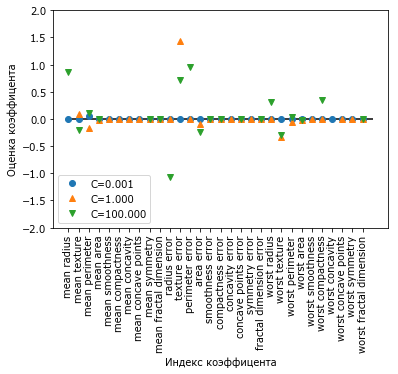

In [37]:
# Коэффиценты логистической регресии с L1-штрафом для набора данных Breast Cancer
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', max_iter=5000, C=C, penalty='l1').fit(X_train, y_train)
    print('Правильность на обучающем для логрегрессии l1 с С={:.3f} : {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Правильность на тестовом для логрегрессии l1 с С={:.3f} : {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффицента")
plt.ylabel("Оценка коэффицента")
plt.ylim(-2, 2)
plt.legend(loc=3)

### Линейные модели для мультиклассовой классификации

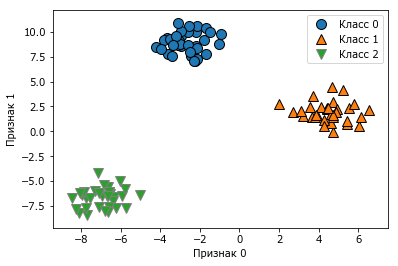

In [38]:
# подход "один против остальных"
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2',])

In [39]:
# Теперь обучаем на этих наборах данных классификатор класса LinearSVC
linear_svm = LinearSVC().fit(X, y)
print('Форма коэффициента: ', linear_svm.coef_.shape)
print('Форма константы: ', linear_svm.intercept_.shape)

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


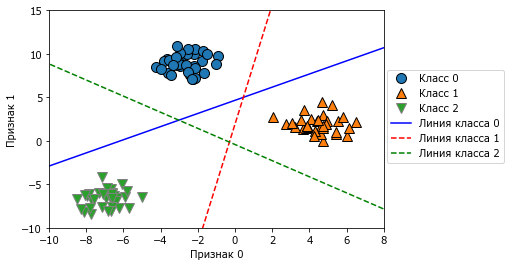

In [40]:
# Визуализация линии границы принятия решений полученные с помощью трёх бинарных классификаторов
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color, linestyle in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g'], ['-', '--', '--']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=linestyle)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Признак 1')

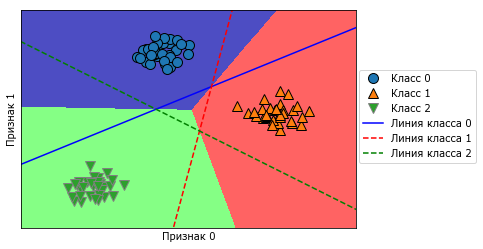

In [41]:
# Мультиклассовые границы принятий решений, полученные с помощью трёх бинарных классификаторов в рамках подхода "один против всех"
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
for coef, intercept, color, linestyle in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g'], ['-', '--', '--']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=linestyle)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

## Деревья принятний решени

In [7]:
# sklearn отвечают два класса в деревье решений: DecisionTreeClassifier & DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [12]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [13]:
# установим ограничение в глубину принятий решение. Это делается для того, чтобы модель не переобучалась
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


In [14]:
# Анализ деревьев решений
# сохраняем в файл .dot
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [24]:
# считываем результаты
import graphviz

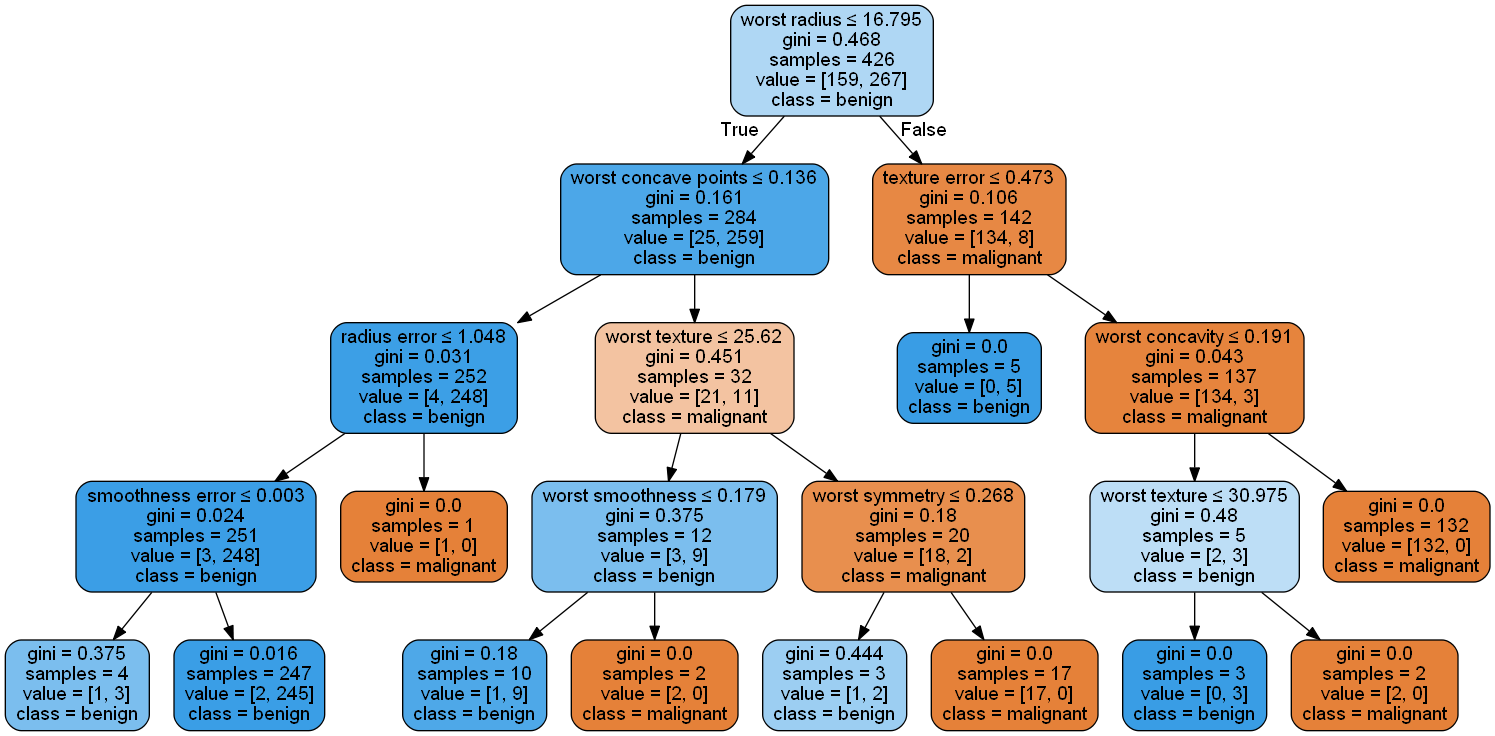

In [25]:
# попробуем сохранить в картинке
from IPython.display import Image
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus

clf = DecisionTreeClassifier(max_depth=4,random_state=0)
clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=cancer.feature_names,
                               class_names=cancer.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [31]:
# Важность признаков в деревьях
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
for name, importance in zip(cancer['feature_names'], classifier.feature_importances_):
    print(name, importance)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0130707442982194
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.0
texture error 0.0
perimeter error 0.0
area error 0.016008931603369594
smoothness error 0.009912606834833533
compactness error 0.014271468840050566
concavity error 0.0
concave points error 0.0
symmetry error 0.006689751018773701
fractal dimension error 0.00802770122252844
worst radius 0.0
worst texture 0.06759236470200562
worst perimeter 0.6954632181471273
worst area 0.0
worst smoothness 0.008601108452709049
worst compactness 0.0
worst concavity 0.0
worst concave points 0.1509177505009375
worst symmetry 0.009444354379445229
worst fractal dimension 0.0


Text(0, 0.5, 'Цена в долларах за Мбайт')

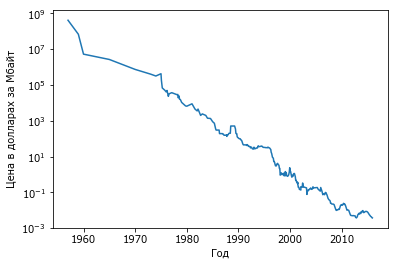

In [33]:
# тренимся на дата сете по оперативной памяти
import pandas as pd
ram_prices = pd.read_csv('L:/Pprojects/ml-intro/data/ram_price.csv')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Год')
plt.ylabel('Цена в долларах за Мбайт')

In [39]:
# делаем предсказание цен на деревье принятия решений и логистической регресии. сравниваем результаты работы на графике
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#прогнозируем цены по датам
X_train = data_train.date[:, np.newaxis]
#используем логпреобразование, чтобы получить простую взаимосвязь между данными и откликом
y_train = np.log(data_train.price)


tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#прогнозирум по всем данным
X_all = ram_prices.date[:, np.newaxis]
predict_tree = tree.predict(X_all)
predict_lr = linear_reg.predict(X_all)

#экспоненцирум, чтобы обратить логорифмическое преобразование
price_tree = np.exp(predict_tree)
price_lr = np.exp(predict_lr)

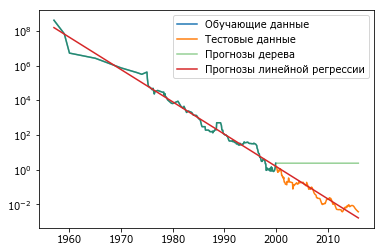

In [46]:
plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева", alpha=.5)
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")
plt.legend()

## Ансамбли деревьев решений

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [9]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

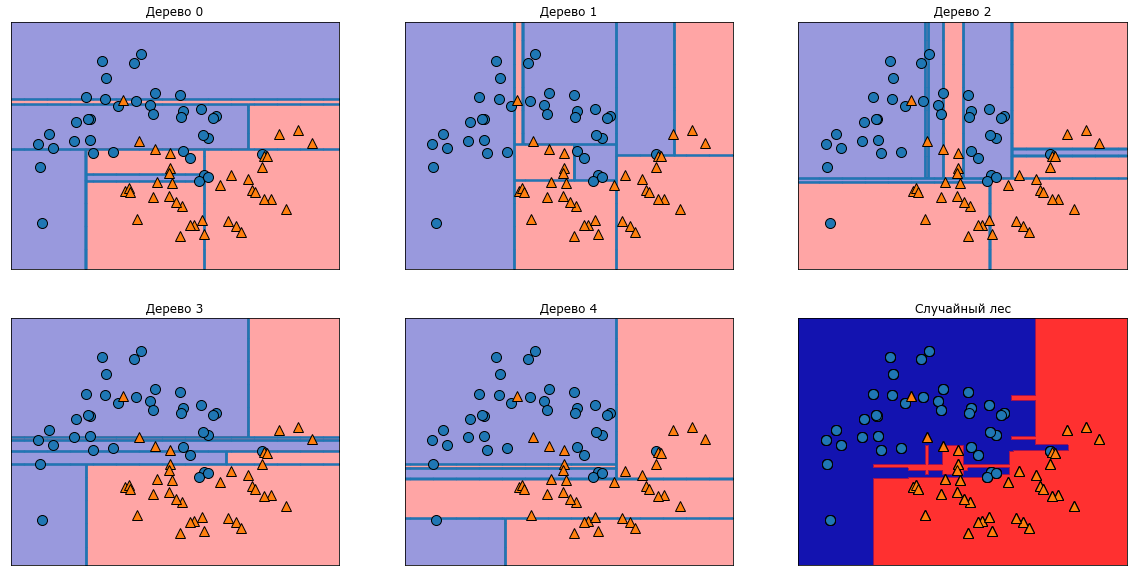

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Дерево {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
    axes[-1, -1].set_title("Случайный лес")
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [17]:
# построим случайный лес состоящий из 100 деревьев, на наборе данных Breast Cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Правильность на обучающем наборе: {: .3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {: .3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе:  1.000
Правильность на тестовом наборе:  0.972


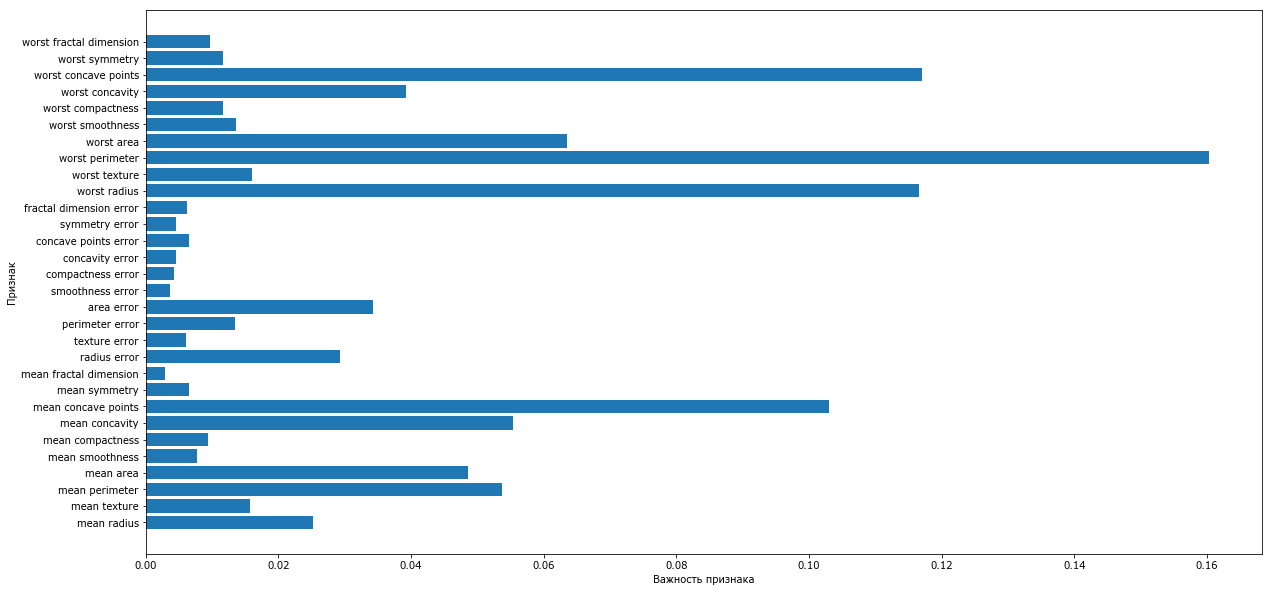

In [21]:
# важность признаков вычисленные случайным лесом, является более надежным показателем, чем важность, вычисленные одним деревом
def plot_feature_importances_cancer(model):
    plt.subplots(figsize=(20, 10))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

plot_feature_importances_cancer(forest)

#### Градиентный бустинг деревьев регрессии (машины градиентного бустинга)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.958


In [25]:
# так как правильность на обучающем наборе составляет 100%, мы, столкнулись с переобучением модели.
# для уменьшения переобучения мы можем применить более сильную предварительую оберзку, ограничив максимальную глубину или
# снизить скорость обучения
# СНижение глубины
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.972


In [26]:
# Снижение скорости
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.965


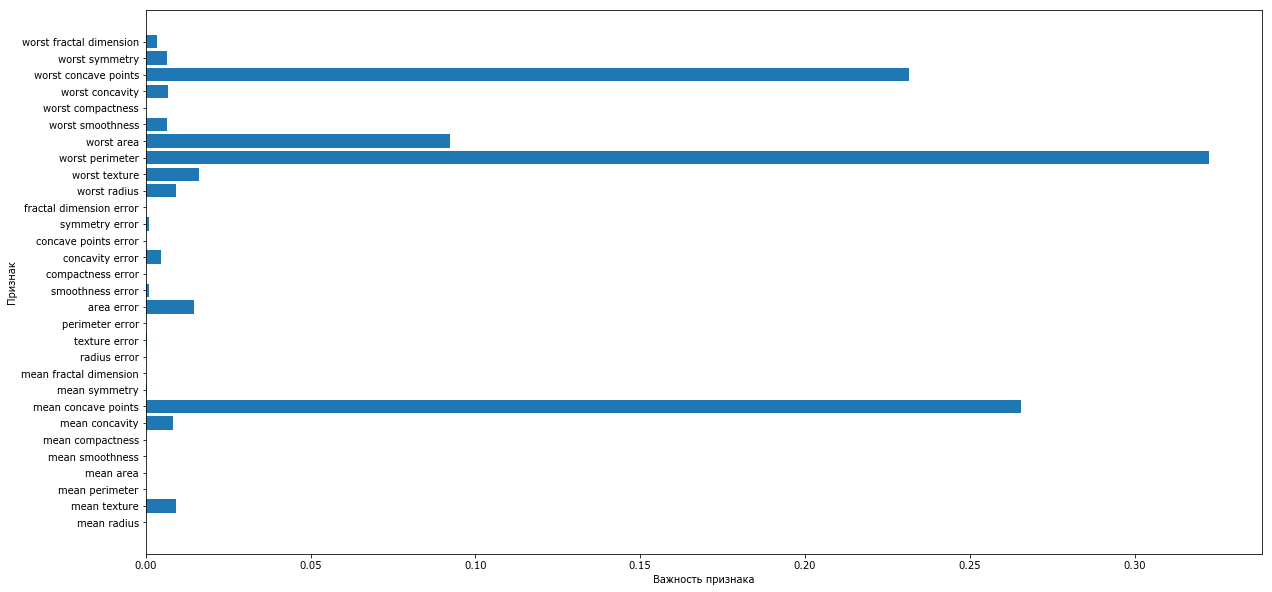

In [27]:
# визуализация важности признаков, чтобы получить более глубокое представление о модели.
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## Ядерный метод опорных векторов

Text(0, 0.5, 'Признак 1')

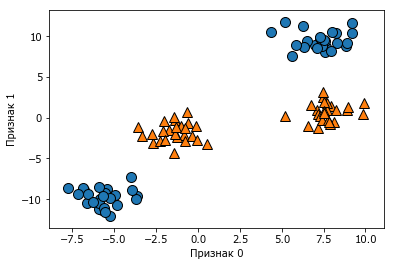

In [76]:
# набор данных с двухклассовой классификацией, в котором классы линейно не разделемы
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0, 0.5, 'Признак 1')

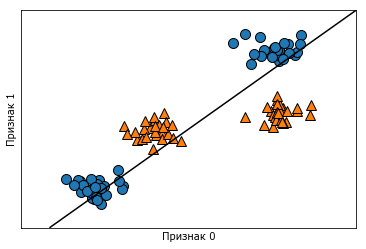

In [77]:
# Линейную модель классификации можно раздлить только прямой
# Граница принятия решений, найденная с помощью метода линейного SVM
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

In [78]:
# теперь расширим набор данных, допавим скажем feature1 ** 2 , то есть квадрат второго признака
# в результате получиться трёх мерное пространство

# добавляем второй признак, возведенный в квадрат
X_new = np.hstack([X, X[:, 1:] ** 2])

Text(0.5, 0, 'Призак 1 ** 2')

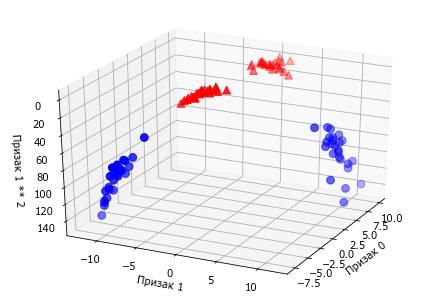

In [79]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# визуализируем в 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# сначала размещаем на графике все точки с у == 0, затем с у == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', marker='o', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("Призак 0")
ax.set_ylabel("Призак 1")
ax.set_zlabel("Призак 1 ** 2")

In [80]:
# теперь можем представить границу принятий решений, найденная методом линейного SVM для расширенного трехмерного набора данных
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

In [81]:
print("LinearSVM coef: {}".format(coef))
print("LinearSVM intercept: {}".format(intercept))

LinearSVM coef: [ 0.13008403 -0.22027859 -0.05969517]
LinearSVM intercept: [1.17337301]


Text(0.5, 0, 'Призак 1 ** 2')

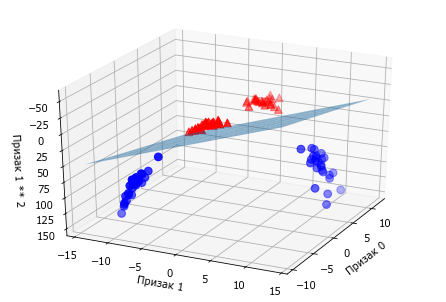

In [82]:
# показать границу принятия решений линейной модели
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.5)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', marker='o', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("Призак 0")
ax.set_ylabel("Призак 1")
ax.set_zlabel("Призак 1 ** 2")

Text(0, 0.5, 'Признак 1')

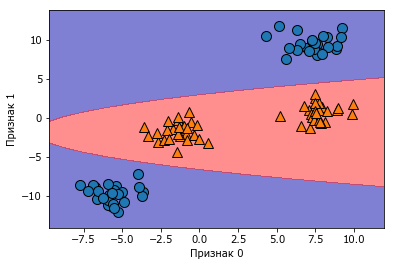

In [83]:
# Фактическая модель линейной SVM как функция исходных признаков больше не является линейной
# это не линия, а скорее эллипс
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[ XX.ravel(), YY.ravel(), ZZ.ravel() ])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

#### Понимание принципов работы SVM

В ходе обучения модель SVM вычисляет важность каждой точки обучающих данных с точки зрения определения решающей границы между двумя классами. Обычно лишь часть точек обучающего набора важна для определения границы принятия решений: это точки, которые лежат на границу между классами. Они называются *опорными векторами (support vectors)*

Расстояние между точками данных измеряется с помощью гауссовского ядра: <br />
    <center>$k_{rbf}(x_1,x_2)$ = exp(-$\gamma$$||x_1 - x_2||^2$)</center>

Text(1, 0.1, 'Граница принятия решений и опорные веторы, найденные моделью SVM с помощью ядра RBF')

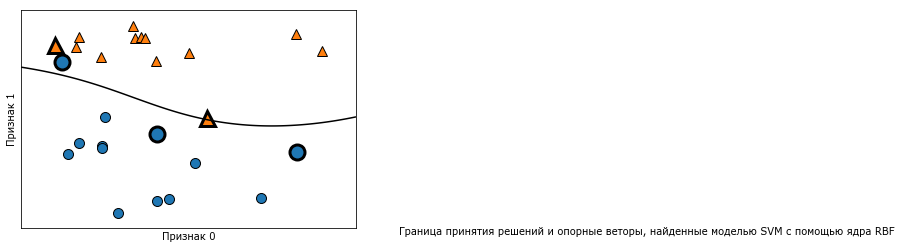

In [17]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# размещаем на графике опорные ветора
sv = svm.support_vectors_
# метки классов опорных векторов определяются знаком дуальных коэффициентов
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.figtext(1,.1,'Граница принятия решений и опорные веторы, найденные моделью SVM с помощью ядра RBF')

## Нейронные сети (глубокое обучение)

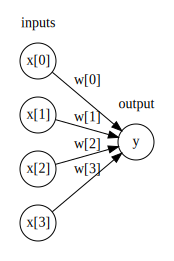

In [2]:
# Визуализация логистической регрессии, в котороый входные признаки и прогнозы показаны в виде узлов, а коэффициенты
# в виде соединений между узлами
display(mglearn.plots.plot_logistic_regression_graph())

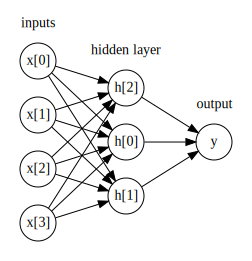

In [3]:
# Иллюстрация работы многослойного персептрона с одним скрытым слоем
display(mglearn.plots.plot_single_hidden_layer_graph())

Для небольшой сети, полная формула вычисления цулеваой переменной y в случае регрессии будет выглядить так (при использовании tanh): <br>
h[0] = tanh(w[0,0] * x[0] + w[1,0] * x[1] + w[2,0] * x[2] + w[3,0] * x[3])<br>
h[1] = tanh(w[0,0] * x[0] + w[1,0] * x[1] + w[2,0] * x[2] + w[3,0] * x[3])<br>
h[2] = tanh(w[0,0] * x[0] + w[1,0] * x[1] + w[2,0] * x[2] + w[3,0] * x[3])<br>
<center>$\hat{y}$ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2]</center>

Text(0, 0.5, 'relu(x), tanh(x)')

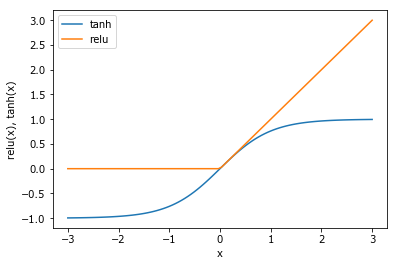

In [5]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

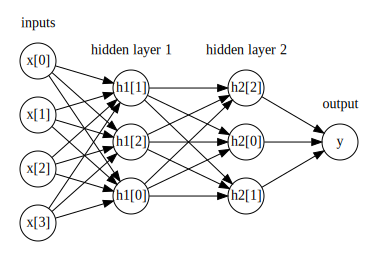

In [7]:
# многослойный персептрон с двумя скрытыми слоями
mglearn.plots.plot_two_hidden_layer_graph()

#### Настройка нейронных сетей

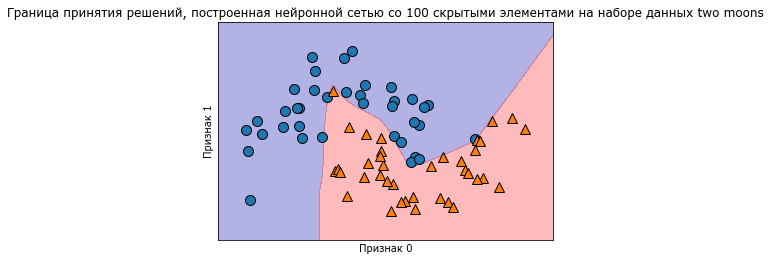

In [30]:
# MLP (MultiLayer Persptrons) рассматривается как обобщение линейных моделей, в котором, прежде чем прийти к решению,
# выполняется несколько этапов обработки данных
# Применим на практике
from sklearn.neural_network import MLPClassifier

X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.title("Граница принятия решений, построенная нейронной сетью со 100 скрытыми элементами на наборе данных two moons", fontdict={'fontsize': 12})
plt.show()

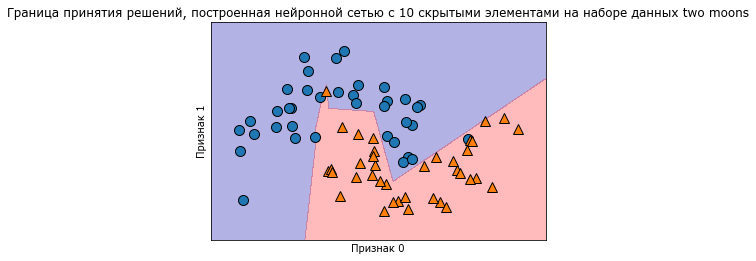

In [33]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.title("Граница принятия решений, построенная нейронной сетью с 10 скрытыми элементами на наборе данных two moons")
plt.show()

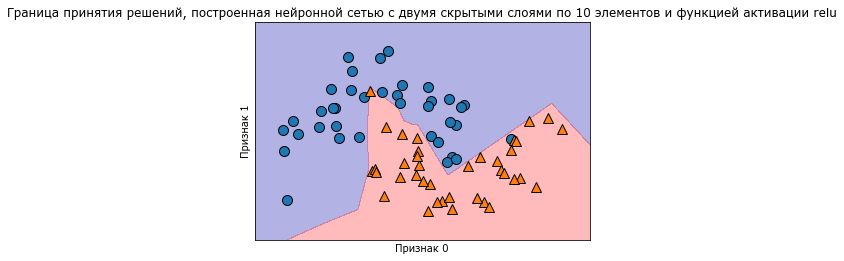

In [35]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.title("Граница принятия решений, построенная нейронной сетью с двумя скрытыми слоями по 10 элементов и функцией активации relu")
plt.show()

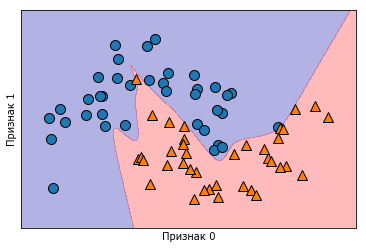

In [37]:
# использование двух скрытых своёв по 10 элементов, на этот раз с функции tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

Мы можем дополнительно настроить сложность нейронной сети с помощью L2-штрафа, чтобы сжать весовые коэффициенты до близких к нулю значений, как мы это делали в моделях гребневой регрессии и линейных классификаторов. В классе MLPClassifier за это отвечает параметр alpha (по умолчанию задано низкое значение лишь небольшая регуляризация).

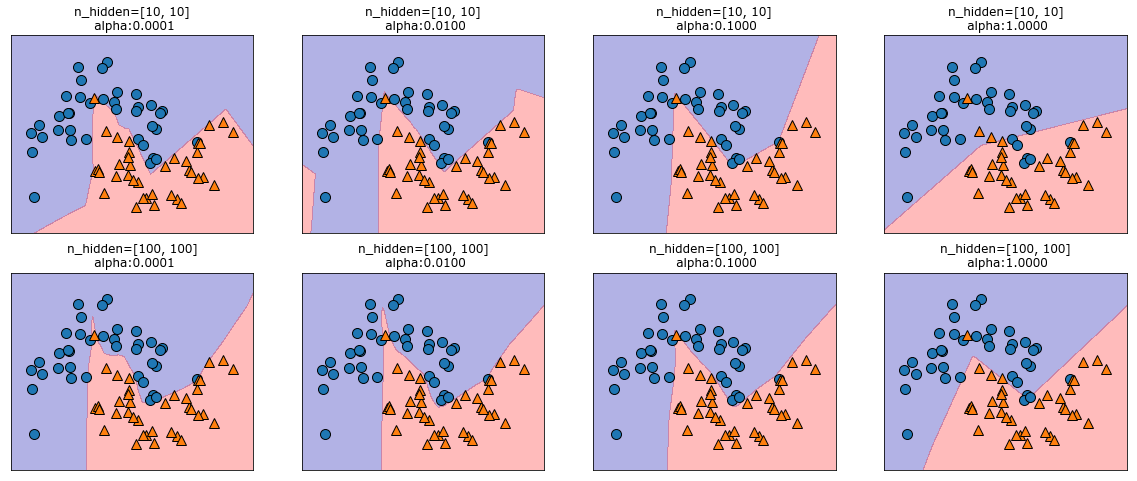

In [45]:
# границы принятия решений для различного количества скрытых элементов и разных значений параметра alpha
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\n alpha:{:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

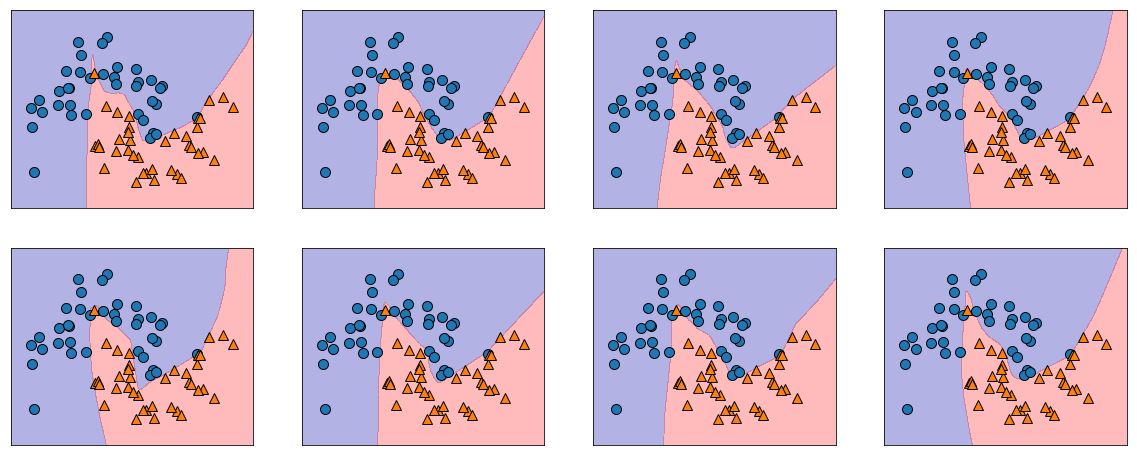

In [47]:
# границы принятия решений, полученные с использованием тех же самых параметров, но разных стартовых значений
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

#### Обучение на реальных данных Breast Cancer

In [57]:
cancer = load_breast_cancer()
print("Максимальное значение характеристик: \n{}".format(cancer.data.max(axis=0)))

Максимальное значение характеристик: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.94
Правильность на тестовом наборе: 0.92


In [67]:
# улучшим показатели как делали методом SVС. Отмасштабируем данные, чтобы они отвечали требованиям.
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)

# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# тоже самое для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


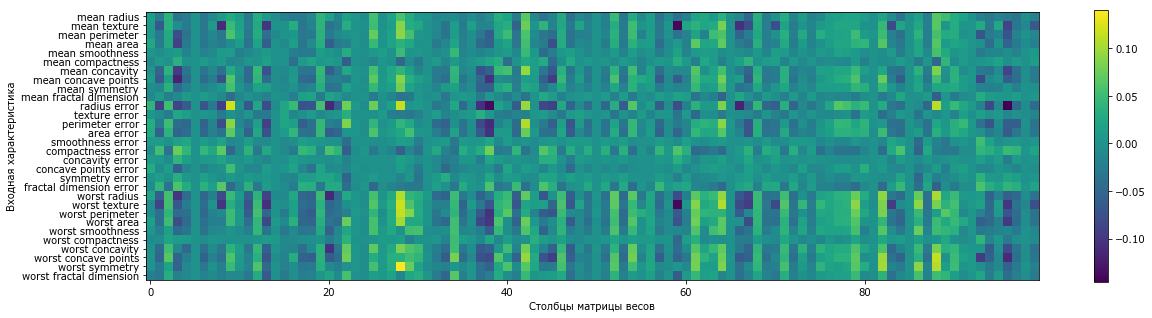

In [69]:
# теплокарта для весов первого слоя нейронной сети, обученной на наборе данных Breast Cancer
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Столбцы матрицы весов")
plt.ylabel("Входная характеристика")
plt.colorbar()

## Оценки неопределенности для классификаторов

Что интересует не только класс, спрогнозированноый моделью для определенной точки тестового набора, но и степень уверенности модели в правильности своего прогноза. В библиотеки sklearn имеется две различные функции, с помощью которых можно оценить неопределенность прогноза: decision_function и predict_proba.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# мы переименовываем классы в 'blue' & 'red' для удобства
y_named = np.array(["blue", "red"])[y]

# мы можем вызвать train_test_split с любым количеством массивов, все будут разбиты одинкаовым образом
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# строим модель градиентного бустинга
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

<h3 style="color: green;">Решаюшая функция: decision_function</h3>

In [23]:
print("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))

Форма решающей функции: (25,)


In [24]:
# выведем несколько первых элементов решающей функции
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6]))

Решающая функция:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


Это значение показывает насколько сильно модель уверена в том что точка данных принадлежит "положительному" классу, в данном случае 1.

In [28]:
print("Решающая функция с порогом отсечения:\n{}".format(gbrt.decision_function(X_test) > 0))
print()
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Решающая функция с порогом отсечения:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]

Прогнозы:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [29]:
# Диапазон значений функции decision_function может быть произвольным и зависит от данных и параметром модели
decision_function = gbrt.decision_function(X_test)
print("Решающая функция минимум: {:.2f} максимум: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Решающая функция минимум: -7.69 максимум: 4.29


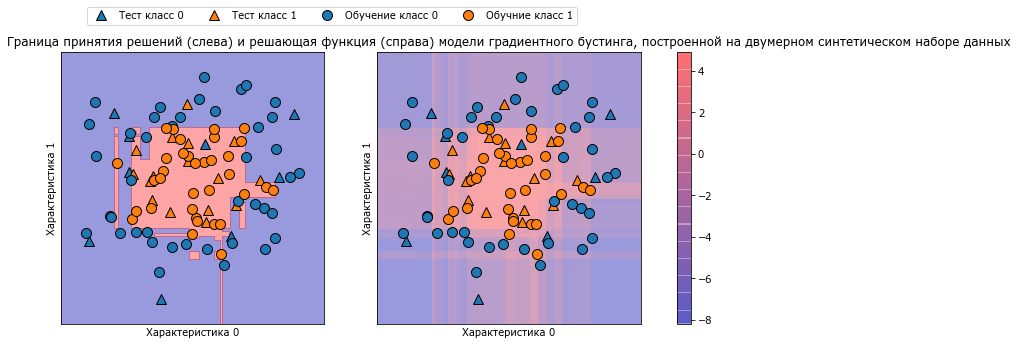

In [41]:
# выведим в виде графика
# на диаграмме точки обучающего набора в виде кружков, а тестовые данные - в виде треугольников
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # размещаем на графике точки обучающего и тестового набора
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers="o", ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
    
axes[0].legend(["Тест класс 0", "Тест класс 1", "Обучение класс 0", "Обучние класс 1"], ncol=4, loc=(.1, 1.1))
plt.colorbar(scores_image, ax=axes.tolist())
plt.title("Граница принятия решений (слева) и решающая функция (справа) модели градиентного бустинга, построенной на двумерном синтетическом наборе данных")
plt.show()

<h3 style="color: green;">Прогнозирование вероятностей: predict_proba</h3>

Вывод функции predict_proba - это вероятность каждого класса, и часто его легче понять, чем вывод функции decision_function. Для бинарной классификации он всегда имеет форму (n_samples, 2)


In [42]:
print("Форма вероятностей: {}".format(gbrt.predict_proba(X_test).shape))

Форма вероятностей: (25, 2)


Первый элемент строки - это оценка вероятности первого класса, а второй - это оценка вероятности второго класса. Поскольку речь идет о вероятности, значения в выводе функции predict_proba всегда находится в диапазоне между 0 и 1, а сумма значений для обоих классов всегда равна 1

In [43]:
# выведим первые несколько элементов вывода функции predict_proba
print("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test[:6])))

Спрогнозированные вероятности:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


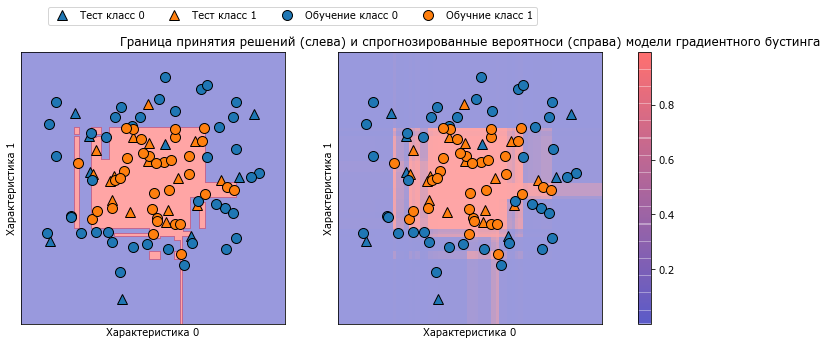

In [46]:
# выведим в виде графика
# на диаграмме точки обучающего набора в виде кружков, а тестовые данные - в виде треугольников
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # размещаем на графике точки обучающего и тестового набора
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers="o", ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
    
axes[0].legend(["Тест класс 0", "Тест класс 1", "Обучение класс 0", "Обучние класс 1"], ncol=4, loc=(.1, 1.1))
plt.colorbar(scores_image, ax=axes.tolist())
plt.title("Граница принятия решений (слева) и спрогнозированные вероятноси (справа) модели градиентного бустинга")
plt.show()

<h3 style="color: green;">Неопределенность в мультикласовой классификации</h3>

In [57]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))
# выведим первые несколько элементов решающей функции
print("Решающая функция:\n {}".format(gbrt.decision_function(X_test)[:6, :]))

Форма решающей функции: (38, 3)
Решающая функция:
 [[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [62]:
print("Argmax решающей функции:\n {}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print()
print("Прогнозы:\n {}".format(gbrt.predict(X_test)))

Argmax решающей функции:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]

Прогнозы:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


Вывод функции predict_proba имеет точно такую же форму: (n_samples, n_classes). И снова вероятности возможных классов для каждой точки данных, дают в сумме 1. 

In [68]:
# выведим первые несколько элементов predict_proba
print("Спрогнозированные вероятности:\n {}".format(gbrt.predict_proba(X_test)[:6]))
print()
# покажем, что сумма значений в каждой строке равна 1
print("Суммы: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Спрогнозированные вероятности:
 [[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]

Суммы: [1. 1. 1. 1. 1. 1.]


In [69]:
print("Argmax решающей функции:\n {}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print()
print("Прогнозы:\n {}".format(gbrt.predict(X_test)))

Argmax решающей функции:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]

Прогнозы:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
